In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=93f19915fd49cfdfc225fb330054f637f6fb2a090eb610f69d3b923117a74c6b
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
# importing all the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import anvil.server
%matplotlib inline


In [ ]:
# mounting google drive as to load our data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
anvil.server.connect("server_63UNCU4RSL4HO2VGQY4Z4E5G-RSQX64F52J32MFBG")

In [ ]:
# loading our datasets

movies_df = pd.read_csv("/content/drive/MyDrive/Minor/movies_metadata_minor.csv")
credits_df = pd.read_csv("/content/drive/MyDrive/Minor/credits_minor.csv")
keywords_df = pd.read_csv("/content/drive/MyDrive/Minor/keywords_minor.csv")
ratings_df = pd.read_csv("/content/drive/MyDrive/Minor/ratings_small_minor.csv")

<ipython-input-69-673ad9ae30ec>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("/content/drive/MyDrive/Minor/movies_metadata_minor.csv")


In [ ]:
# vizualizing the movies metadata

movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# taking stock of all the columns

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# keeping only the relavant data

trimmed = ['genres', 'id', 'overview', 'popularity', 'title', 'vote_average', 'vote_count']
movies_df_trimmed = movies_df[trimmed]
movies_df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45466 non-null  object 
 1   id            45466 non-null  object 
 2   overview      44512 non-null  object 
 3   popularity    45461 non-null  object 
 4   title         45460 non-null  object 
 5   vote_average  45460 non-null  float64
 6   vote_count    45460 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.4+ MB


In [ ]:
# since we encountered an error trying to convert the column 'id', checking the troublesome bits

error_values = []
error_indices = []

for index, value in enumerate(movies_df_trimmed['id']):
    try:
        int_value = int(value)
    except ValueError:
        error_values.append(value)
        error_indices.append(index)

print("Values that are not convertible to float:")
for value, index in zip(error_values, error_indices):
    print(f"Value: {value}, Index: {index}")

Values that are not convertible to float:
Value: 1997-08-20, Index: 19730
Value: 2012-09-29, Index: 29503
Value: 2014-01-01, Index: 35587


In [ ]:
# dropping the values that are giving us trouble and converting the id column to int

movies_df_trimmed = movies_df_trimmed.drop([19730, 29503, 35587])
movies_df_trimmed['id'] = movies_df_trimmed['id'].astype(int)
movies_df_trimmed['popularity'] = movies_df_trimmed['popularity'].astype(float)

In [ ]:
# vizualizing the credits dataset

credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
# vizualizing the keywords dataset

keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [ ]:
# vizualizing the ratings dataset

ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
# merging the dataframes: movies_df_trimmed, keywords_df, and credits_df

movies_df_merged = pd.merge(movies_df_trimmed, keywords_df, on = 'id')
movies_df_merged = pd.merge(movies_df_merged, credits_df, on = 'id')

In [ ]:
# vizualizing the new dataset

movies_df_merged.head()

,genres,id,overview,popularity,title,vote_average,vote_count,keywords,cast,crew
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [ ]:
movies_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        46628 non-null  object 
 1   id            46628 non-null  int64  
 2   overview      45633 non-null  object 
 3   popularity    46624 non-null  float64
 4   title         46624 non-null  object 
 5   vote_average  46624 non-null  float64
 6   vote_count    46624 non-null  float64
 7   keywords      46628 non-null  object 
 8   cast          46628 non-null  object 
 9   crew          46628 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.6+ MB


In [ ]:
# checking null and duplicate values

print("null values:", movies_df_merged.isnull().sum())
print("duplicate values:", movies_df_merged.duplicated().sum())

null values: genres            0
id                0
overview        995
popularity        4
title             4
vote_average      4
vote_count        4
keywords          0
cast              0
crew              0
dtype: int64
duplicate values: 1172


In [ ]:
# Dropping null and duplicate values
movies_df_merged.dropna(inplace=True)
movies_df_merged.drop_duplicates(inplace=True)

In [ ]:
# functions to clean the data in columns: crew, genre, cast, keywords

def genres_keywords(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

def cast3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter += 1
        else:
            break
    return L

def crew_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [ ]:
movies_df_merged['genres'] = movies_df_merged['genres'].apply(genres_keywords)
movies_df_merged['keywords'] = movies_df_merged['keywords'].apply(genres_keywords)
movies_df_merged['cast'] = movies_df_merged['cast'].apply(cast3)
movies_df_merged['crew'] = movies_df_merged['crew'].apply(crew_director)

The Gay Divorcee
Touki Bouki
Character
Swiss Family Robinson
Wings
Mother Night
Stefano Quantestorie
['Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck']


In [ ]:
movies_df_merged.head()

,genres,id,overview,popularity,title,vote_average,vote_count,keywords,cast,crew
0,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,92.0,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]
3,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale,6.1,34.0,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker]
4,[Comedy],11862,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II,5.7,173.0,"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer]


In [ ]:
# breaking down overview into words, and adding keywords, cast, crew, and genres with it in a new column to initiate countervectorization

movies_df_merged['overview'] = movies_df_merged['overview'].apply(lambda x:x.split())
movies_df_merged['content'] = movies_df_merged['overview'] + movies_df_merged['genres'] + movies_df_merged['keywords'] + movies_df_merged['cast'] + movies_df_merged['crew']
movies_df_merged.iloc[0].content

['Led',
 'by',
 'Woody,',
 "Andy's",
 'toys',
 'live',
 'happily',
 'in',
 'his',
 'room',
 'until',
 "Andy's",
 'birthday',
 'brings',
 'Buzz',
 'Lightyear',
 'onto',
 'the',
 'scene.',
 'Afraid',
 'of',
 'losing',
 'his',
 'place',
 'in',
 "Andy's",
 'heart,',
 'Woody',
 'plots',
 'against',
 'Buzz.',
 'But',
 'when',
 'circumstances',
 'separate',
 'Buzz',
 'and',
 'Woody',
 'from',
 'their',
 'owner,',
 'the',
 'duo',
 'eventually',
 'learns',
 'to',
 'put',
 'aside',
 'their',
 'differences.',
 'Animation',
 'Comedy',
 'Family',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boy next door',
 'new toy',
 'toy comes to life',
 'Tom Hanks',
 'Tim Allen',
 'Don Rickles',
 'John Lasseter']

In [ ]:
# replacing the blank space in the content column with nothing so that the count vectorizer doesn't confuse two similar sounding people/words

movies_df_merged['content'] = movies_df_merged['content'].apply(lambda x:[i.replace(" ", "") for i in x])

In [ ]:
movies_df_merged.head()

,genres,id,overview,popularity,title,vote_average,vote_count,keywords,cast,crew,content
0,"[Animation, Comedy, Family]",862,"[Led, by, Woody,, Andy's, toys, live, happily,...",21.946943,Toy Story,7.7,5415.0,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,"[Adventure, Fantasy, Family]",8844,"[When, siblings, Judy, and, Peter, discover, a...",17.015539,Jumanji,6.9,2413.0,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],"[When, siblings, Judy, and, Peter, discover, a..."
2,"[Romance, Comedy]",15602,"[A, family, wedding, reignites, the, ancient, ...",11.712900,Grumpier Old Men,6.5,92.0,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch],"[A, family, wedding, reignites, the, ancient, ..."
3,"[Comedy, Drama, Romance]",31357,"[Cheated, on,, mistreated, and, stepped, on,, ...",3.859495,Waiting to Exhale,6.1,34.0,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,[Comedy],11862,"[Just, when, George, Banks, has, recovered, fr...",8.387519,Father of the Bride Part II,5.7,173.0,"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer],"[Just, when, George, Banks, has, recovered, fr..."


In [ ]:
# joining the content, turning it into lowercase, and stemming the words

ps = PorterStemmer()

def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

movies_df_merged['content'] = movies_df_merged['content'].apply(lambda x: ' '.join(x))
movies_df_merged['content'] = movies_df_merged['content'].apply(lambda x: x.lower())
movies_df_merged['content'] = movies_df_merged['content'].apply(stem)

In [ ]:
# using the ratings dataset to thin out the movies_df_merged as to not overburden the machine

unique_numbers = ratings_df['movieId'].unique().tolist()
filtered_df = movies_df_merged[movies_df_merged['id'].isin(unique_numbers)]
filtered_df.head()

,genres,id,overview,popularity,title,vote_average,vote_count,keywords,cast,crew,content
5,"[Action, Crime, Drama, Thriller]",949,"[Obsessive, master, thief,, Neil, McCauley, le...",17.924927,Heat,7.7,1886.0,"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],"obsess master thief, neil mccauley lead a top-..."
9,"[Adventure, Action, Thriller]",710,"[James, Bond, must, unmask, the, mysterious, h...",14.686036,GoldenEye,6.6,1194.0,"[cuba, falsely accused, secret identity, compu...","[Pierce Brosnan, Sean Bean, Izabella Scorupco]",[Martin Campbell],jame bond must unmask the mysteri head of the ...
14,"[Action, Adventure]",1408,"[Morgan, Adams, and, her, slave,, William, Sha...",7.284477,Cutthroat Island,5.7,137.0,"[exotic island, treasure, map, ship, scalp, pi...","[Geena Davis, Matthew Modine, Frank Langella]",[Renny Harlin],"morgan adam and her slave, william shaw, are o..."
15,"[Drama, Crime]",524,"[The, life, of, the, gambling, paradise, –, La...",10.137389,Casino,7.8,1343.0,"[poker, drug abuse, 1970s, overdose, illegal p...","[Robert De Niro, Sharon Stone, Joe Pesci]",[Martin Scorsese],the life of the gambl paradis – la vega – and ...
16,"[Drama, Romance]",4584,"[Rich, Mr., Dashwood, dies,, leaving, his, sec...",10.673167,Sense and Sensibility,7.2,364.0,"[bowling, based on novel, servant, country lif...","[Kate Winslet, Emma Thompson, Hugh Grant]",[Ang Lee],"rich mr. dashwood dies, leav hi second wife an..."


In [ ]:
# applying countvectorizer and vizualizing it's shape

cv = CountVectorizer(stop_words = 'english')
cv.fit_transform(filtered_df['content']).toarray().shape

(2812, 26388)

In [ ]:
# transporting the array of vectors that were transformed from our dataset to vectorized_array and vizualizing the shape of the cosine similarity matrix

vectorized_array = cv.fit_transform(filtered_df['content']).toarray()
cosine_similarity(vectorized_array).shape

(2812, 2812)

In [ ]:
# vizualizing the cosine similarity matrix

cosine_similarity(vectorized_array)

array([[1.        , 0.03800743, 0.06401024, ..., 0.01294885, 0.        ,
        0.03752933],
       [0.03800743, 1.        , 0.04318335, ..., 0.        , 0.        ,
        0.03375798],
       [0.06401024, 0.04318335, 1.        , ..., 0.02942449, 0.        ,
        0.02842676],
       ...,
       [0.01294885, 0.        , 0.02942449, ..., 1.        , 0.02139802,
        0.03450328],
       [0.        , 0.        , 0.        , ..., 0.02139802, 1.        ,
        0.        ],
       [0.03752933, 0.03375798, 0.02842676, ..., 0.03450328, 0.        ,
        1.        ]])

In [ ]:
similar_picks = cosine_similarity(vectorized_array)
similar_picks[0].shape

(2812,)

In [ ]:
# taking an example of index 0, finding out the top 5 similar picks via cosine similarity except for itself, enumerating that data in a list and showing the row-id and the distance

sorted(list(enumerate(similar_picks[0])), reverse = True, key = lambda x:x[1])[1:6]

[(1572, 0.22268633069394778),
 (1167, 0.220402307950287),
 (917, 0.20641132188622038),
 (166, 0.17334055600697576),
 (742, 0.17270209875102116)]

In [ ]:
# defining a function to do the same for any given movie by tracking the title of the movie to its index

def recommend(movie, n):
    movie_index = filtered_df[filtered_df['title'] == movie].index[0]
    distances = similar_picks[movie_index]
    movies_list  = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:n]

    recommendations = []
    for i in movies_list:
        print(movies_df_merged.iloc[i[0]].title)

In [ ]:
recommend('Heat', 10)

The Gay Divorcee
Touki Bouki
Character
Swiss Family Robinson
Wings
Mother Night
Stefano Quantestorie
The Big Blue
Clay Pigeons


In [ ]:
# collaborative filtering. we will take our movies_df_merged and then merge it with the ratings_df dataframe

movies_ratings = pd.merge(movies_df_merged, ratings_df, left_on='id', right_on='movieId')
movies_ratings.drop(['timestamp'],axis=1,inplace=True)

In [ ]:
# vizualizing the merged dataset

movies_ratings.head()

,genres,id,overview,popularity,title,vote_average,vote_count,keywords,cast,crew,content,userId,movieId,rating
0,"[Action, Crime, Drama, Thriller]",949,"[Obsessive, master, thief,, Neil, McCauley, le...",17.924927,Heat,7.7,1886.0,"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],"obsess master thief, neil mccauley lead a top-...",23,949,3.5
1,"[Action, Crime, Drama, Thriller]",949,"[Obsessive, master, thief,, Neil, McCauley, le...",17.924927,Heat,7.7,1886.0,"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],"obsess master thief, neil mccauley lead a top-...",102,949,4.0
2,"[Action, Crime, Drama, Thriller]",949,"[Obsessive, master, thief,, Neil, McCauley, le...",17.924927,Heat,7.7,1886.0,"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],"obsess master thief, neil mccauley lead a top-...",232,949,2.0
3,"[Action, Crime, Drama, Thriller]",949,"[Obsessive, master, thief,, Neil, McCauley, le...",17.924927,Heat,7.7,1886.0,"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],"obsess master thief, neil mccauley lead a top-...",242,949,5.0
4,"[Action, Crime, Drama, Thriller]",949,"[Obsessive, master, thief,, Neil, McCauley, le...",17.924927,Heat,7.7,1886.0,"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],"obsess master thief, neil mccauley lead a top-...",263,949,3.0


In [ ]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44867 entries, 0 to 44866
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        44867 non-null  object 
 1   id            44867 non-null  int64  
 2   overview      44867 non-null  object 
 3   popularity    44867 non-null  float64
 4   title         44867 non-null  object 
 5   vote_average  44867 non-null  float64
 6   vote_count    44867 non-null  float64
 7   keywords      44867 non-null  object 
 8   cast          44867 non-null  object 
 9   crew          44867 non-null  object 
 10  content       44867 non-null  object 
 11  userId        44867 non-null  int64  
 12  movieId       44867 non-null  int64  
 13  rating        44867 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 4.8+ MB


In [ ]:
# finding out the unique number of items in the dataset

movies_ratings['id'].nunique()

2809

In [ ]:
# vizualizing the mean ratings of the movies.

movies_ratings.groupby('title')['rating'].describe()['mean']

title
!Women Art Revolution                   3.250000
'Gator Bait                             0.500000
'Twas the Night Before Christmas        4.000000
...And God Created Woman                4.000000
00 Schneider - Jagd auf Nihil Baxter    4.000000
                                          ...   
xXx                                     3.517857
¡Three Amigos!                          4.000000
À nos amours                            3.285714
Ödipussi                                4.500000
Şaban Oğlu Şaban                        4.500000
Name: mean, Length: 2773, dtype: float64

In [ ]:
# making two new dataframes, one for mean ratings, another for number of times the movie has been rated.

movies_rating_mean = movies_ratings.groupby('title')['rating'].describe()['mean']
movies_rating_count = movies_ratings.groupby('title')['rating'].describe()['count']

In [ ]:
# vizualizing the mean ratings dataframe

movies_rating_mean

title
!Women Art Revolution                   3.250000
'Gator Bait                             0.500000
'Twas the Night Before Christmas        4.000000
...And God Created Woman                4.000000
00 Schneider - Jagd auf Nihil Baxter    4.000000
                                          ...   
xXx                                     3.517857
¡Three Amigos!                          4.000000
À nos amours                            3.285714
Ödipussi                                4.500000
Şaban Oğlu Şaban                        4.500000
Name: mean, Length: 2773, dtype: float64

In [ ]:
# vizualizing the count ratings dataframe

movies_rating_count

title
!Women Art Revolution                    2.0
'Gator Bait                              1.0
'Twas the Night Before Christmas         2.0
...And God Created Woman                 1.0
00 Schneider - Jagd auf Nihil Baxter     2.0
                                        ... 
xXx                                     28.0
¡Three Amigos!                           1.0
À nos amours                            14.0
Ödipussi                                 1.0
Şaban Oğlu Şaban                         1.0
Name: count, Length: 2773, dtype: float64

In [ ]:
# concatinating the two dataframes and defining a new dataframe

movies_rating_mean_count = pd.concat([movies_rating_mean, movies_rating_count], axis = 1)

In [ ]:
# vizualizing the new dataframe

movies_rating_mean_count.head()

,mean,count
title,,
!Women Art Revolution,3.25,2.0
'Gator Bait,0.50,1.0
'Twas the Night Before Christmas,4.00,2.0
...And God Created Woman,4.00,1.0
00 Schneider - Jagd auf Nihil Baxter,4.00,2.0


In [ ]:
# resetting the index in order to further operate on the dataframe

movies_rating_mean_count.reset_index()

,title,mean,count
0,!Women Art Revolution,3.250000,2.0
1,'Gator Bait,0.500000,1.0
2,'Twas the Night Before Christmas,4.000000,2.0
3,...And God Created Woman,4.000000,1.0
4,00 Schneider - Jagd auf Nihil Baxter,4.000000,2.0
...,...,...,...
2768,xXx,3.517857,28.0
2769,¡Three Amigos!,4.000000,1.0
2770,À nos amours,3.285714,14.0
2771,Ödipussi,4.500000,1.0


<Axes: ylabel='Frequency'>

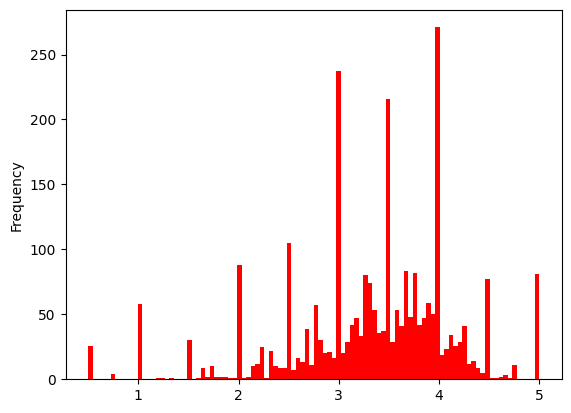

In [ ]:
# vizualizing the pattern of user-ratings based on mean ratings and their frequency

movies_rating_mean_count['mean'].plot(bins=100, kind='hist', color = 'r')

<Axes: ylabel='Frequency'>

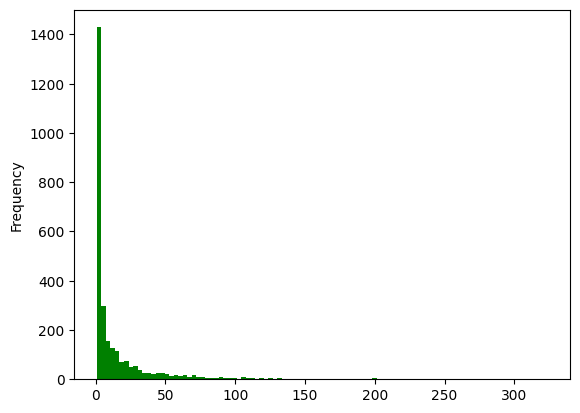

In [ ]:
# vizualizing the number of times a movie has been rated

movies_rating_mean_count['count'].plot(bins=100, kind='hist', color = 'g')

In [ ]:
# vizualizing the number of times a movie has been rated in descending order

movies_rating_mean_count.sort_values('count', ascending = False).head(100)

,mean,count
title,,
Terminator 3: Rise of the Machines,4.256173,324.0
The Million Dollar Hotel,4.487138,311.0
Solaris,4.134426,305.0
The 39 Steps,4.221649,291.0
Monsoon Wedding,3.706204,274.0
...,...,...
Metropolis,2.597826,92.0
School of Rock,3.728261,92.0
The Science of Sleep,3.750000,90.0


In [ ]:
# pivoting the movies_ratings df in order to get a user_movie_rating df

user_movie_rating = movies_ratings.pivot_table(index = 'userId', columns = 'title', values = 'rating').fillna(0)

In [ ]:
user_movie_rating

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# using the user_movie_rating pd to make a user_similarity_matrix in order to find out how similar the users are

user_similarity_matrix = pd.DataFrame(cosine_similarity(user_movie_rating))

In [ ]:
# vizualizing the user_similarity_matrix

user_similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,669,670
0,1.000000,0.000000,0.000000,0.111740,0.045325,0.000000,0.086490,0.000000,0.032783,0.000000,...,0.000000,0.000000,0.009896,0.019835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.172900,0.118982,0.105927,0.000000,0.231172,0.104280,0.116057,0.030537,...,0.472035,0.176746,0.095611,0.247965,0.474999,0.514490,0.093228,0.044339,0.173073,0.110196
2,0.000000,0.172900,1.000000,0.065062,0.138674,0.000000,0.186351,0.305685,0.251273,0.140265,...,0.192807,0.124901,0.262051,0.215030,0.202532,0.132969,0.234504,0.106074,0.224741,0.208421
3,0.111740,0.118982,0.065062,1.000000,0.165071,0.097829,0.257316,0.139444,0.037562,0.056626,...,0.112458,0.070405,0.137142,0.275753,0.129289,0.117589,0.102466,0.121362,0.009076,0.148079
4,0.045325,0.105927,0.138674,0.165071,1.000000,0.077913,0.134511,0.201534,0.094029,0.064509,...,0.228081,0.000000,0.141043,0.237052,0.155886,0.069493,0.000000,0.000000,0.073629,0.208827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.000000,0.514490,0.132969,0.117589,0.069493,0.000000,0.276210,0.065858,0.060316,0.053350,...,0.378493,0.095925,0.102622,0.161459,0.391899,1.000000,0.134238,0.033517,0.163404,0.129363
667,0.000000,0.093228,0.234504,0.102466,0.000000,0.032905,0.062473,0.227580,0.329296,0.186917,...,0.107697,0.277403,0.147427,0.119395,0.163572,0.134238,1.000000,0.000000,0.312899,0.211612
668,0.000000,0.044339,0.106074,0.121362,0.000000,0.000000,0.120240,0.105074,0.000000,0.051856,...,0.028811,0.151515,0.114646,0.114898,0.051052,0.033517,0.000000,1.000000,0.000000,0.123836
669,0.000000,0.173073,0.224741,0.009076,0.073629,0.000000,0.113042,0.249204,0.371262,0.102490,...,0.197403,0.228158,0.117581,0.149755,0.235435,0.163404,0.312899,0.000000,1.000000,0.202329


In [ ]:
# using the user_movie_rating pd to make an item_similarity_matrix in order to find out how similar the movies are

item_similarity_matrix = pd.DataFrame(cosine_similarity(user_movie_rating.T), index=user_movie_rating.columns, columns=user_movie_rating.columns)

In [ ]:
# vizualizing the item_similarity_matrix

item_similarity_matrix

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
title,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,1.000000,0.000000,0.513704,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.118456,0.000000,0.000000,0.0,0.0
'Gator Bait,0.000000,1.000000,0.000000,0.000000,0.000000,0.207390,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.182018,0.000000,0.038180,0.0,0.0
'Twas the Night Before Christmas,0.513704,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...And God Created Woman,0.000000,0.000000,0.000000,1.000000,0.789352,0.345651,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,0.631169,0.813733,0.339227,0.130013,1.000000,0.000000,0.0,0.0
00 Schneider - Jagd auf Nihil Baxter,0.000000,0.000000,0.000000,0.789352,1.000000,0.272840,0.000000,0.0,0.0,0.0,...,0.000000,0.789352,0.498214,0.642322,0.267769,0.102626,0.789352,0.210963,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xXx,0.118456,0.182018,0.000000,0.130013,0.102626,0.154590,0.014121,0.0,0.0,0.0,...,0.105379,0.130013,0.082060,0.105796,0.044104,1.000000,0.130013,0.006949,0.0,0.0
¡Three Amigos!,0.000000,0.000000,0.000000,1.000000,0.789352,0.345651,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,0.631169,0.813733,0.339227,0.130013,1.000000,0.000000,0.0,0.0
À nos amours,0.000000,0.038180,0.000000,0.000000,0.210963,0.007918,0.031102,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.222770,0.006949,0.000000,1.000000,0.0,0.0


In [ ]:
# defining a function that takes userid, user_movie_rating df, and item_similarity_matrix to see what will the user like

def generate_recommendations(user_id, user_movie_rating, item_similarity_matrix, top_n=5):
    user_items = user_movie_rating.loc[user_id]

    item_scores = {}
    for item_id, interaction in user_items.items():
        similar_items = item_similarity_matrix[item_id].sort_values(ascending=False).head(top_n)

        for similar_item_id, similarity_score in similar_items.items():
            if similar_item_id not in item_scores:
                item_scores[similar_item_id] = 0
            item_scores[similar_item_id] += similarity_score * interaction

    sorted_item_scores = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = [item_id for item_id, score in sorted_item_scores[:top_n]]

    return recommendations

In [ ]:
user_id = 1

top_n = 10
recommendations = generate_recommendations(user_id, user_movie_rating, item_similarity_matrix, top_n)
print("Recommendations for user", user_id, ":", recommendations)

Recommendations for user 1 : ['American Pie', 'My Tutor', 'Rocky IV', 'Dirty Hands', 'Heathers', 'Cleopatra Jones and the Casino of Gold', 'Confidentially Yours', 'Rocky III', 'Kiss of the Dragon', 'Madame Bovary']


In [ ]:
@anvil.server.callable

def movie_recommend_content(movie, n):
    m = n+1
    movie_index = filtered_df[filtered_df['title'] == movie].index[0]
    distances = similar_picks[movie_index]
    movies_list  = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:m]

    recommendations = []
    for i in movies_list:
        print(movies_df_merged.iloc[i[0]].title)

    for index, movie_index in enumerate(movies_list, start=1):
      movie_title = movies_df_merged.iloc[movie_index[0]].title
      recommendations.append(f"{index}. {movie_title}")

    print(recommendations)

    recommendations_str = str(recommendations)
    recommendations_str = recommendations_str.replace("(", "").replace(")", "").replace("[", "").replace("]", "")
    return recommendations_str



In [ ]:
@anvil.server.callable
def movie_recommend_collaborative(user_id, n):
    user_items = user_movie_rating.loc[user_id]

    item_scores = {}
    for item_id, interaction in user_items.items():
        similar_items = item_similarity_matrix[item_id].sort_values(ascending=False).head(n)

        for similar_item_id, similarity_score in similar_items.items():
            if similar_item_id not in item_scores:
                item_scores[similar_item_id] = 0
            item_scores[similar_item_id] += similarity_score * interaction

    sorted_item_scores = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = [(f"{index}. {item_id}") for index, (item_id, score) in enumerate(sorted_item_scores[:n], start=1)]

    recommendations_str = str(recommendations)
    print(recommendations_str)
    recommendations_str = recommendations_str.replace("(", "").replace(")", "").replace("[", "").replace("]", "")
    return recommendations_str



In [ ]:
anvil.server.wait_forever()

The Gay Divorcee
Touki Bouki
Character
Swiss Family Robinson
Wings
Mother Night
Stefano Quantestorie
['1. The Gay Divorcee', '2. Touki Bouki', '3. Character', '4. Swiss Family Robinson', '5. Wings', '6. Mother Night', '7. Stefano Quantestorie']
['1. American Pie', '2. My Tutor', '3. Rocky IV', '4. Dirty Hands', '5. Cleopatra Jones and the Casino of Gold', '6. Confidentially Yours', '7. Rocky III', '8. Kiss of the Dragon']
The Gay Divorcee
Touki Bouki
Character
Swiss Family Robinson
Wings
Mother Night
Stefano Quantestorie
['1. The Gay Divorcee', '2. Touki Bouki', '3. Character', '4. Swiss Family Robinson', '5. Wings', '6. Mother Night', '7. Stefano Quantestorie']
['1. American Pie', '2. My Tutor', '3. Rocky IV', '4. Dirty Hands', '5. Heathers', '6. Cleopatra Jones and the Casino of Gold', '7. Confidentially Yours', '8. Rocky III', '9. Kiss of the Dragon', '10. Madame Bovary']
The Gay Divorcee
Touki Bouki
Character
Swiss Family Robinson
Wings
Mother Night
Stefano Quantestorie
['1. The Ga